# EDA (analisis exploratorio) - Dataset de peliculas



## Imports

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

## 1. Lectura del conjunto de datos

In [2]:
df = pd.read_csv('data/movies_dataset_cleaned.csv') 

## 2. Exploración y Visualización del Conjunto de Datos

In [37]:
df.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.0,81.0,['English'],Released,NaN,Toy Story,7.7,1995,12.451801
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.0,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,0.0,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,0.000000
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.0,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.090760
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,76578911.0,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,0.000000


In [10]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,release_year,return
count,4.536300e+04,45363.000000,4.536600e+04,45117.000000,45363.000000,45366.000000,4.536600e+04
mean,4.233796e+06,2.926515,1.123256e+07,94.178181,5.624064,1991.747917,6.601883e+02
std,1.744222e+07,6.010299,6.439684e+07,38.345037,1.915402,29.001165,7.470153e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.388835,0.000000e+00,85.000000,5.000000,1978.000000,0.000000e+00
50%,0.000000e+00,1.130302,0.000000e+00,95.000000,6.000000,2001.000000,0.000000e+00
75%,0.000000e+00,3.691946,0.000000e+00,107.000000,6.800000,2010.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,2020.000000,1.239638e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45363 non-null  float64
 2   genres                 42982 non-null  object 
 3   id                     45366 non-null  object 
 4   original_language      45355 non-null  object 
 5   overview               44425 non-null  object 
 6   popularity             45363 non-null  float64
 7   production_companies   33570 non-null  object 
 8   production_countries   39154 non-null  object 
 9   release_date           45363 non-null  object 
 10  revenue                45366 non-null  float64
 11  runtime                45117 non-null  float64
 12  spoken_languages       41597 non-null  object 
 13  status                 45283 non-null  object 
 14  tagline                20394 non-null  object 
 15  ti

In [12]:
print("Longitud del conjunto de datos:", len(df))
print("Número de características del conjunto de datos:", len(df.columns))

Longitud del conjunto de datos: 45366
Número de características del conjunto de datos: 19


## 2. Relación entre variables

### Relación entre número de películas y puntaje de votación


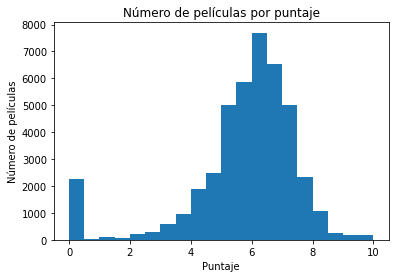

In [4]:
votes = df['vote_average']

plt.hist(votes, bins=20)

plt.title('Número de películas por puntaje')
plt.xlabel('Puntaje')
plt.ylabel('Número de películas')

plt.show()

En la gráfica se puede apreciar que el puntaje promedio de las películas se sitúa alrededor de 6, lo que indica que la mayoría de las películas tienen una calificación moderada. Sin embargo, es importante tener en cuenta que existe un número considerable de películas con puntaje 0, las cuales podrían considerarse como **outliers** en la distribución.

### Presupuesto por año

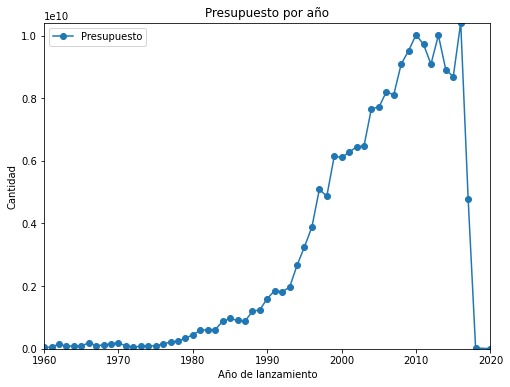

In [16]:
df_grouped = df.groupby('release_year').agg({'budget': 'sum', 'id': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(df_grouped['release_year'], df_grouped['budget'], marker='o', label='Presupuesto')


ax.set_xlabel('Año de lanzamiento')
ax.set_ylabel('Cantidad')
ax.set_title('Presupuesto por año')
ax.legend()

ax.set_xlim(1960, df['release_year'].max())
ax.set_ylim(0, df_grouped['budget'].max())

plt.show()

En la gráfica se observa que la cantidad de películas estrenadas alcanza su máximo en 2018 y luego experimenta un descenso abrupto en 2019. Este descenso podría considerarse como un **outlier** en los datos. Una posible explicación de este fenómeno es la influencia de la pandemia ocurrida en ese año, la cual impactó negativamente en la industria cinematográfica y en actividades similares en general.

Esta conclusión coincide la siguiente grafica que representa la cantidad de películas estrenadas por año, donde se aprecia claramente el descenso en el año 2019:

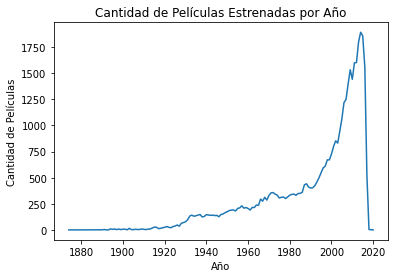

In [6]:
movies_per_year = df['release_year'].value_counts().sort_index()

fig, ax = plt.subplots()
ax.plot(movies_per_year.index, movies_per_year.values)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Películas')
ax.set_title('Cantidad de Películas Estrenadas por Año')

plt.show()

### Películas con mayor popularidad


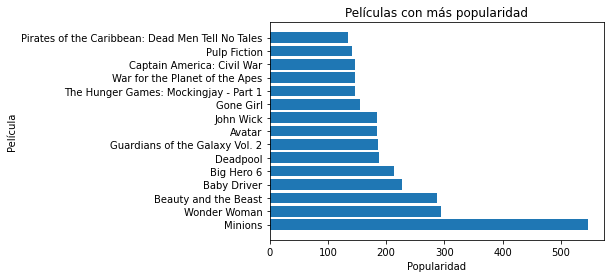

In [17]:

df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce').replace(np.nan, 0) 
df_sorted = df.sort_values(by='popularity', ascending=False).head(15)

fig, ax = plt.subplots()

ax.barh(df_sorted['title'], df_sorted['popularity'])

ax.set_xlabel('Popularidad')
ax.set_ylabel('Película')
ax.set_title('Películas con más popularidad')

plt.show()

### Generos mas comunes

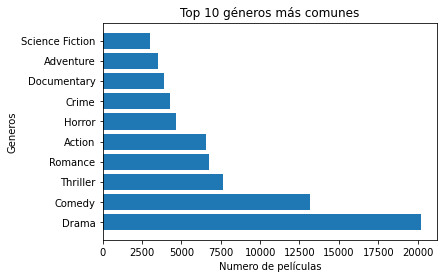

In [90]:
from collections import Counter

df = df.dropna(subset=['genres'])
df["genres"] = df["genres"].apply(lambda x: ast.literal_eval(x))

genres_count = Counter()
for genres_list in df["genres"]:
    genres_count.update(genres_list)

top_genres = []
top_counts = []
for genre, count in genres_count.most_common(10):
    top_genres.append(genre)
    top_counts.append(count)
    
fig, ax = plt.subplots()

ax.barh(top_genres, top_counts)

ax.set_xlabel("Numero de películas")
ax.set_ylabel("Generos")
ax.set_title("Top 10 géneros más comunes")

plt.show()

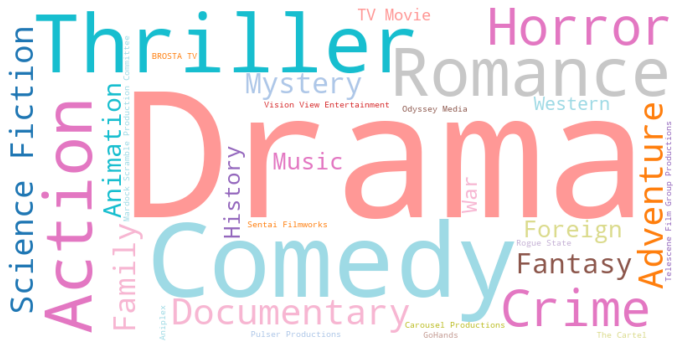

In [106]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab20').generate_from_frequencies(genres_count)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Correlación entre variables 

### Matriz de correlación

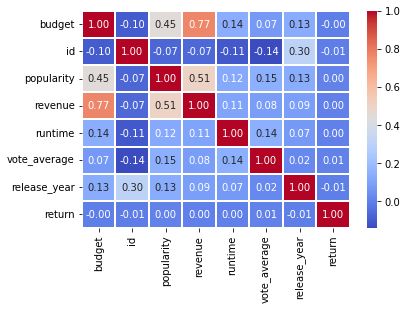

In [19]:
g = sns.heatmap(df[list(df)].corr(numeric_only = True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.01)
plt.show()

### Variables con mayor correlación

In [21]:
correlations = df.corr(numeric_only = True).abs().unstack().sort_values(ascending=False)
correlations = correlations[correlations != 1]  # Excluir la correlación de variables consigo mismas
correlations = correlations.reset_index()

top_correlations = correlations[:10]  # Obtener las 10 correlaciones más altas

print("Variables más correlacionadas:")
for i, row in top_correlations.iterrows():
    variable_1 = row['level_0']
    variable_2 = row['level_1']
    correlation = row[0]
    print(f"{variable_1} - {variable_2}: {correlation}")

Variables más correlacionadas:
revenue - budget: 0.7683533474519021
budget - revenue: 0.7683533474519021
popularity - revenue: 0.5051410846102767
revenue - popularity: 0.5051410846102767
budget - popularity: 0.4469396146589477
popularity - budget: 0.4469396146589477
release_year - id: 0.30150514963953473
id - release_year: 0.30150514963953473
vote_average - popularity: 0.148352941806674
popularity - vote_average: 0.148352941806674


Se observa una relación significativa entre el presupuesto y las ganancias de las películas, así como entre las ganancias y la popularidad. Estas correlaciones indican que, en general, a medida que aumenta el presupuesto invertido en una película, también tienden a aumentar las ganancias generadas por la misma. Además, existe una tendencia a que las películas más populares sean las que generan mayores ganancias. Sin embargo, es importante tener en cuenta que la correlación no implica necesariamente una relación causal directa entre estas variables.